<a href="https://colab.research.google.com/github/MariaKhalidAlvi/-PyTorch-Tutorials/blob/main/Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# a simple neural network
class Model(nn.Module):

  def __init__(self, in_feature=4, hidden_layer_1 = 8, hidden_layer_2 = 5, output_features = 3 ):

    super().__init__()

    self.fc1 = nn.Linear(in_feature, hidden_layer_1)
    self.fc2 = nn.Linear(hidden_layer_1, hidden_layer_2)
    self.out =nn.Linear(hidden_layer_2,output_features )


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [8]:
torch.manual_seed(41)
model = Model()

In [11]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [12]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-13-fe54450bb049>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [14]:

# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [15]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [18]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01 )

In [25]:
# Print the parameters
for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Parameter: {param}")
    print(f"Requires Gradient: {param.requires_grad}")
    print()

Name: fc1.weight
Parameter: Parameter containing:
tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]], requires_grad=True)
Requires Gradient: True

Name: fc1.bias
Parameter: Parameter containing:
tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626],
       requires_grad=True)
Requires Gradient: True

Name: fc2.weight
Parameter: Parameter containing:
tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.10

In [27]:
epochs = 100
losses = []

for i in range(epochs):

  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f"Epoch {i} and Loss {loss}")


  optimizer.zero_grad(). # prevents gradients from stacking up
  loss.backward() # backpropagation
  optimizer.step() # updates parameters


Epoch 0 and Loss 1.1206659078598022
Epoch 10 and Loss 1.0250275135040283
Epoch 20 and Loss 0.8752369284629822
Epoch 30 and Loss 0.686155378818512
Epoch 40 and Loss 0.578098714351654
Epoch 50 and Loss 0.5010992288589478
Epoch 60 and Loss 0.4606378376483917
Epoch 70 and Loss 0.4096275568008423
Epoch 80 and Loss 0.3172949254512787
Epoch 90 and Loss 0.2045793980360031


Text(0.5, 0, 'Epoch')

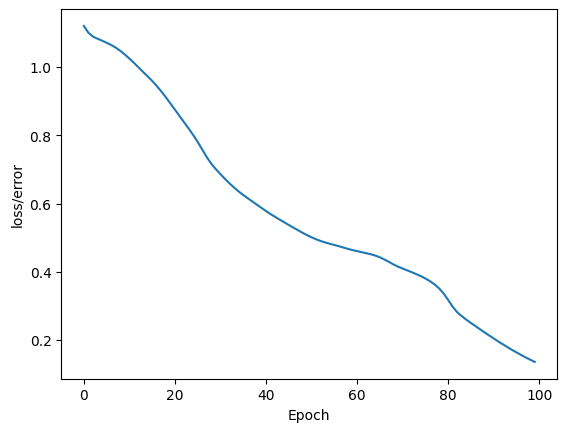

In [32]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')


In [35]:
with torch.no_grad(): #turn off back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.1747)

In [37]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-6.1531,  0.5297,  1.9023]) 	 2 	 2
2.)  tensor([-7.6177,  0.3461,  3.1279]) 	 2 	 2
3.)  tensor([-8.0981,  0.3458,  2.9363]) 	 2 	 2
4.)  tensor([-4.3744,  0.8607, -0.6534]) 	 1 	 1
5.)  tensor([-7.0597,  0.4675,  2.1519]) 	 2 	 2
6.)  tensor([-3.3600,  1.0189, -1.8097]) 	 1 	 1
7.)  tensor([-5.9521,  0.6065,  1.2240]) 	 2 	 2
8.)  tensor([-4.2459,  0.8982, -0.9733]) 	 1 	 1
9.)  tensor([-6.4742,  0.5470,  1.6013]) 	 2 	 2
10.)  tensor([-7.9455,  0.3332,  3.1225]) 	 2 	 2
11.)  tensor([-5.7228,  0.6465,  0.9207]) 	 2 	 2
12.)  tensor([  5.4413,  -0.5876, -10.9568]) 	 0 	 0
13.)  tensor([ 4.8403, -0.4375, -9.8209]) 	 0 	 0
14.)  tensor([-2.5601,  1.0680, -1.9716]) 	 1 	 1
15.)  tensor([ 3.9652, -0.2431, -9.4012]) 	 0 	 0
16.)  tensor([-5.5545,  0.6689,  0.7671]) 	 2 	 2
17.)  tensor([ 4.5521, -0.3689, -9.7427]) 	 0 	 0
18.)  tensor([-6.0031,  0.5774,  1.4909]) 	 1 	 2
19.)  tensor([  6.1210,  -0.7378, -11.6477]) 	 0 	 0
20.)  tensor([ 3.5890, -0.1631, -8.2706]) 	 0 	 0
21.

In [38]:
torch.save(model.state_dict(), "basic_linear_NN_model.pt")

In [40]:
loaded_model =  Model()
loaded_model.load_state_dict(torch.load("basic_linear_NN_model.pt"))

<ipython-input-40-38c0e6d9f1ab>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("basic_linear_NN_model.pt"))


<All keys matched successfully>

In [41]:
loaded_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=3, bias=True)
)